## Principal Component Analysis

This is the idea of Principal Component Analysis: to preserve as much of the spread of the data by creating new variables that are linear combinations of the old variables. These new variables are called principal components (PCs). What is a linear combination? (We've actually already done this!)  

For example, with our 3 variables, the equation for the first principal component would look like:

$$PC_1 = c_1x + c_2y + c_3z$$

The coefficients are calculated via the magic of linear algebra.  

PCA actually produces one new variable (one PC) for each old variable, but they decrease in importance - by importance we mean the amount of variation they capture. The first principal component will always capture the most variation. We reduce dimensionality by choosing only the first two (or three) of these to represent the original data. 

The Principal Components aren't generally something that you can really interpret the meaning of.  You've basically just rotated your data around (with some stretching and shrinking) and are looking at it in a new coordinate system, but the new coordinates themselves aren't readily interpretable.

Code-wise, doing the PCA is very straightforward:

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
tiny = pd.read_csv('./data/small_data.csv')
tiny.head()

,a,b,c
0,119,135,-62
1,81,88,-82
2,90,102,-48
3,54,63,-29
4,62,17,-32


In [38]:
from sklearn.decomposition import PCA

In [40]:
pca = PCA()
tiny_pca = pca.fit_transform(tiny)

In [41]:
tiny_pca[0:10]

array([[ 6.14032156e+01,  3.16423093e+01, -4.43025543e-01],
       [ 2.01293002e+01, -1.68266900e+01,  2.60236216e-02],
       [ 1.65982819e+01,  2.08508471e+01,  9.93031235e-01],
       [-3.86598136e+01,  9.71022839e+00,  1.64838510e+00],
       [-6.02561592e+01, -1.11236474e+01,  3.75447287e+01],
       [-1.15706866e+02, -6.12707652e+00,  2.58627446e-01],
       [-2.25385121e+01, -1.46023649e+01,  1.61037712e+00],
       [ 2.00461034e+01, -1.76164975e+01, -3.63037932e+00],
       [-1.04829674e+02, -7.75746944e+00,  8.98138273e-02],
       [ 1.19699002e+02, -2.46314353e+01, -1.37415842e+00]])

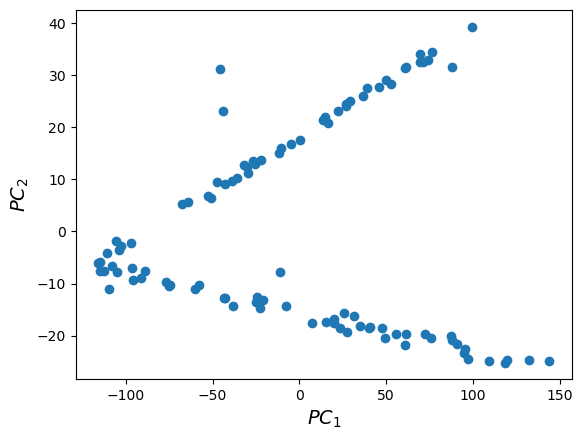

In [42]:
plt.scatter(tiny_pca[:,0], tiny_pca[:,1])
plt.xlabel('$PC_1$', fontsize = 14)
plt.ylabel('$PC_2$', fontsize = 14)
plt.show()

Remember that the goal was to capture the original variation in fewer variables. Here's the variance explained by our 3 original variables:

In [44]:
tiny.var().sum()

5184.609191919192

In [45]:
tiny.cov()

,a,b,c
a,1806.250909,1732.884646,-1371.780606
b,1732.884646,1859.835455,-1340.478384
c,-1371.780606,-1340.478384,1518.522828


In [47]:
tiny.corr()

,a,b,c
a,1.000000,0.945460,-0.828295
b,0.945460,1.000000,-0.797649
c,-0.828295,-0.797649,1.000000


In [23]:
sum(tiny.var())

5184.609191919192

Variance explained by our PCs:

In [49]:
pca.explained_variance_

array([4716.223442  ,  372.2014575 ,   96.18429243])

In [50]:
sum(pca.explained_variance_)

5184.609191919192

The total variance is the same, but it is divided up between the variables differently.

In [51]:
tiny_evr = pca.explained_variance_ratio_
print(tiny_evr)

[0.90965843 0.07178968 0.01855189]


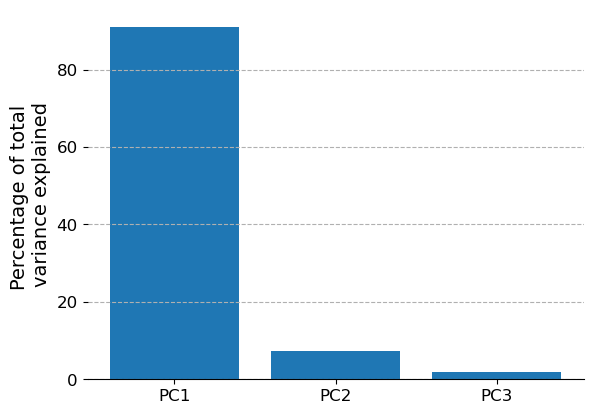

In [52]:
plt.bar(range(1, len(tiny_evr)+1), tiny_evr*100, fill = True)
plt.ylabel('Percentage of total \nvariance explained', fontsize=14)
plt.xticks([1,2,3], ['PC1','PC2','PC3'])
plt.tick_params(labelsize = 12)
plt.grid(axis = 'y', linestyle = '--')
ax = plt.gca()
[ax.spines[i].set_visible(False) for i in ['top','left','right']]
plt.show()

How many PCs do we need in order to explain 90% of the variation?

## Effect of Variable Scales to PCA

In [16]:
work = pd.read_csv('./data/work_retention.csv')

In [17]:
work.head()

,age,children,commute,salary,years worked,retain
0,63,0,0.095167,54233,2.18,1
1,64,0,0.044500,64739,4.53,1
2,40,1,0.159167,95953,4.57,1
3,58,5,0.091167,59038,2.99,1
4,63,0,0.016000,7958,4.36,1


In [20]:
target = work['retain'] #y the target
labels = ['quit', 'stay'] #y_labels
work_numeric = work.drop(columns = ['retain']) #remove the target
work_numeric.head()

,age,children,commute,salary,years worked
0,63,0,0.095167,54233,2.18
1,64,0,0.044500,64739,4.53
2,40,1,0.159167,95953,4.57
3,58,5,0.091167,59038,2.99
4,63,0,0.016000,7958,4.36


Last time, we got stuck on how to visualize all 5 variables together. Now we know how to do that using PCA. Aside from helping to visualize our data, Principal Components can also be used as the features of a model (rather than the original variables) and there are some cases when you might even get more accurate results by doing PCA (or some form of dimensionality reduction) before fitting your model.

**THE CURSE OF DIMENSIONALITY** 

The more variables and hence more dimensions and inputs you have, the more computer power you may need. In addition, you can come up with wonky (overfit - we'll talk about this later) models if you have many input varibles, and also run the risk that all of the different variables making your data look distinct, i.e. no patterns that we can use for predictive models.

In [21]:
pca = PCA()
pca_work = pca.fit_transform(work_numeric)

In [22]:
pca_work[: 3, :]

array([[ 6.41016906e+03,  1.88117756e+01,  5.54637520e-01,
        -1.02340699e+00, -3.91375479e-01],
       [ 1.69161690e+04,  2.03414958e+01, -1.75288388e+00,
        -9.23623236e-01,  4.51683742e-02],
       [ 4.81301702e+04, -2.07291669e+00, -1.68803189e+00,
         1.47127633e-01,  1.58619801e-01]])

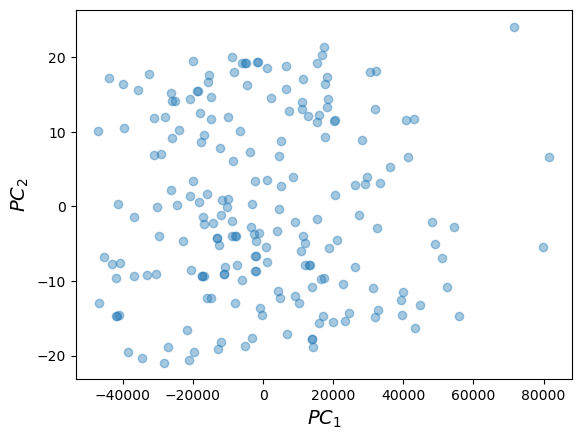

In [23]:
plt.scatter(pca_work[:,0], pca_work[:,1],alpha = 0.4)
plt.xlabel('$PC_1$', fontsize = 14)
plt.ylabel('$PC_2$', fontsize = 14)
plt.show()

Like we did before, we really want to know if there are any differences in the data that relate to whether someone stays or goes. We already know how to write plotting code that will shade in the points by our groups. Let's start with the code we already had and modify it:

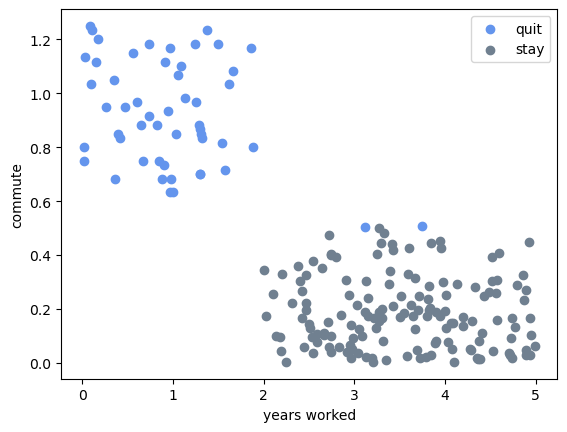

In [24]:
y = work['retain']
labels = ['quit','stay']
colors = ['cornflowerblue', 'slategrey']
for yi in [0,1]:
    idx = y == yi
    plt.scatter(work.loc[idx,'years worked'], work.loc[idx,'commute'], color = colors[yi],
               label = labels[yi])
plt.legend()
plt.xlabel('years worked')
plt.ylabel('commute')
plt.show()

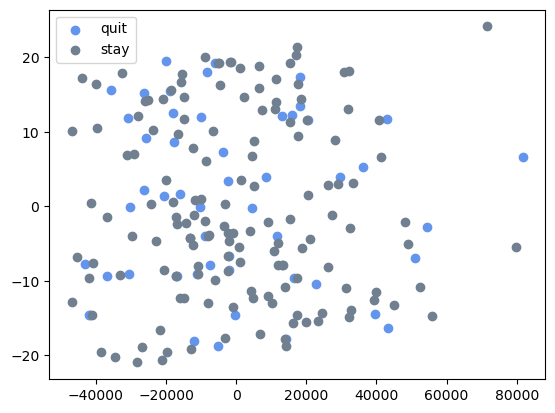

In [25]:
#What has changed?
y = work['retain']
labels = ['quit','stay']
colors = ['cornflowerblue', 'slategrey']
for yi in [0,1]:
    idx = y == yi
    plt.scatter(pca_work[idx,0], pca_work[idx,1], color = colors[yi],
               label = labels[yi])
plt.legend()
plt.show()

When we looked at the two original variables, we DID see a pattern. Why is that pattern gone when we use two PCs? 

We forgot something in our analysis. We should have looked at the univariate distributions, i.e., each individual variable. Let's make a stripchart:

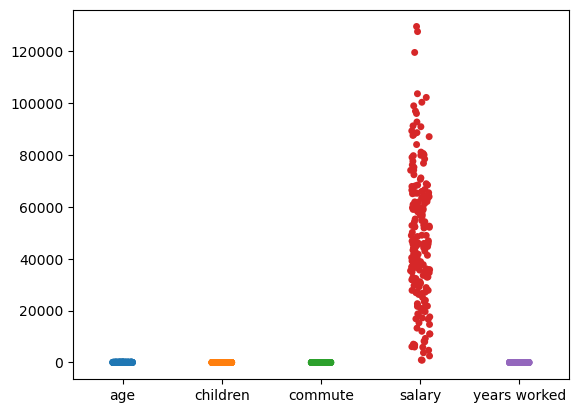

In [26]:
sns.stripplot(data = work_numeric)
plt.show()

Let's also take a look at the variance and the evr from the PCA:

In [27]:
for col in work_numeric.columns:
    print(col, work_numeric[col].var())
print('Total variance:', sum(work_numeric.var()))


age 144.64298994974874
children 1.0902261306532668
commute 0.12752271135608598
salary 656172323.7297488
years worked 1.8814741608040193
Total variance: 656172471.4719617


In [28]:
print(pca.explained_variance_ratio_) 

[9.99999777e-01 2.17854776e-07 2.98936692e-09 1.65526575e-09
 7.25054818e-11]


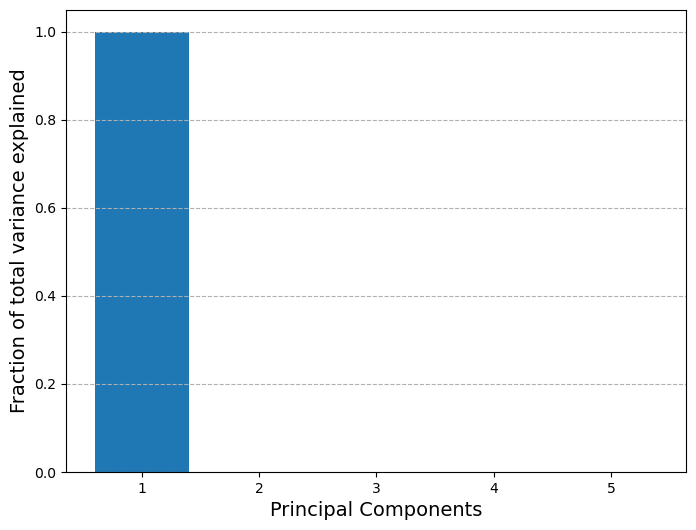

In [29]:
evr = pca.explained_variance_ratio_
plt.figure(figsize=(8,6))
plt.bar(range(1, len(evr)+1), evr, fill = True)
plt.grid(axis = 'y', linestyle = '--')
plt.xlabel('Principal Components', fontsize=14)
plt.ylabel('Fraction of total variance explained', fontsize=14)
plt.show()

What's going on?

In [30]:
from sklearn.preprocessing import StandardScaler as SS

In [31]:
ss = SS()
work_scaled = pd.DataFrame(ss.fit_transform(work_numeric), columns = 
                          work_numeric.columns)
work_scaled.head()

,age,children,commute,salary,years worked
0,1.540846,-0.974532,-0.792575,0.250870,-0.501449
1,1.624202,-0.974532,-0.934813,0.662036,1.216092
2,-0.376355,-0.014402,-0.612905,1.883636,1.245327
3,1.124063,3.826119,-0.803804,0.438920,0.090555
4,1.540846,-0.974532,-1.014822,-1.560161,1.091845


In [32]:
pca_work_scaled = pca.fit_transform(work_scaled)

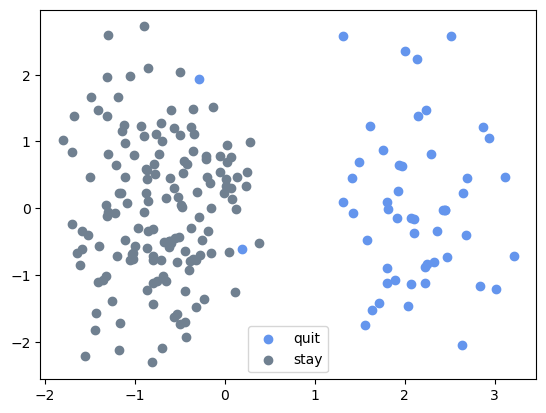

In [33]:
y = work['retain']
labels = ['quit','stay']
colors = ['cornflowerblue', 'slategrey']
for yi in [0,1]:
    idx = y == yi
    plt.scatter(pca_work_scaled[idx,0], pca_work_scaled[idx,1], color = colors[yi],
               label = labels[yi])
plt.legend()
plt.show()

We would have come to an incorrect conclusion based on the first plot.

In [34]:
print(pca.explained_variance_ratio_) 

[0.35675069 0.22437386 0.19870812 0.17651962 0.04364771]


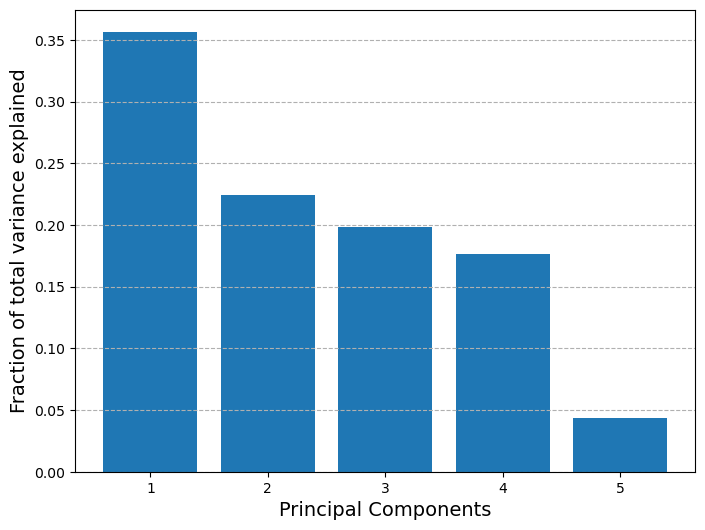

In [35]:
evr = pca.explained_variance_ratio_

plt.figure(figsize=(8,6))
plt.bar(range(1, len(evr)+1), evr, fill = True)
plt.grid(axis = 'y', linestyle = '--')
plt.xlabel('Principal Components', fontsize=14)
plt.ylabel('Fraction of total variance explained', fontsize=14)
plt.show()

It looks like, to get to 90% of total variance explained, we're going to need 4 dimensions, which isn't so much of a reduction. What's important to note here is that our original result simply wasn't correct. That is an example of what can happen if you fail to thoroughly inspect your data before diving into some type of modeling.

# tSNE (t-distributed stochastic neighbor embedding)

tSNE is primarily used for visualization purposes. On the level of matehmatical sophisitication, tSNE is much more complicated than PCA.  tSNE stands for "t-distributed stochastic neighbor embedding".

The plain-english explanation of tSNE is this:  tSNE looks at your data and gets a sense of the distribution of distances between points.  It then does some manipulations of the data with the goal of coming up with a lower-dimensional representation of the data that, as closely as possible, preserves the local distances in the original data.  Although that is a bit of a mouthful, it's not that bad.  tSNE tries to project your data into fewer dimensions, while trying to preserve the "closeness" of "neighbors" (i.e., it tries to keep close points close).

Before continuing, you should explore this [web page](https://distill.pub/2016/misread-tsne/), which contains a very good high-level explanation of tSNE, and has some interactive examples you can play around with.  Once you've read that and explored some of the examples, we'll see how to do tSNE below.

In [81]:
from sklearn.manifold import TSNE

In [82]:
tsne = TSNE(random_state = 146)
#https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [83]:
tsne_work = tsne.fit_transform(work_numeric)

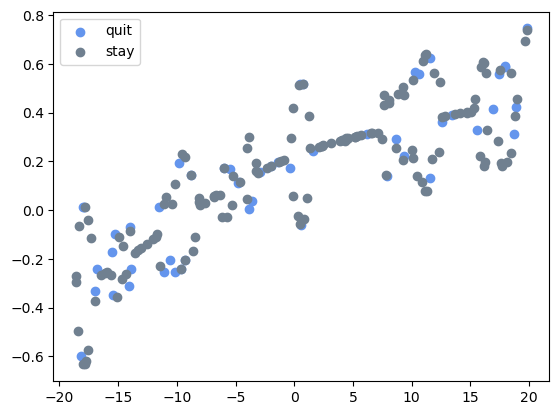

In [84]:
y = work['retain']
labels = ['quit','stay']
colors = ['cornflowerblue', 'slategrey']
for yi in [0,1]:
    idx = y == yi
    plt.scatter(tsne_work[idx,0], tsne_work[idx,1], color = colors[yi],
               label = labels[yi])
plt.legend()
plt.show()

I guess tSNE doesn't work???  

What do you think?

In [85]:
tsne_work = tsne.fit_transform(work_scaled)

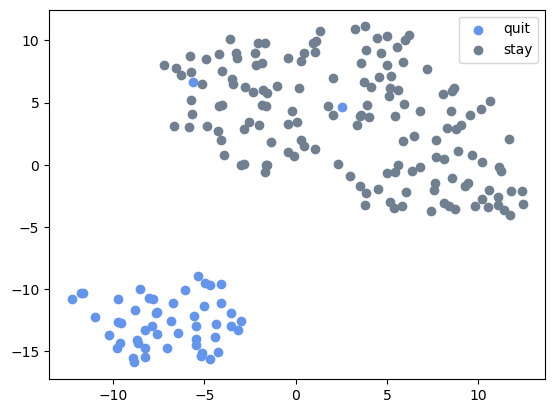

In [86]:
y = work['retain']
labels = ['quit','stay']
colors = ['cornflowerblue', 'slategrey']
for yi in [0,1]:
    idx = y == yi
    plt.scatter(tsne_work[idx,0], tsne_work[idx,1], color = colors[yi],
               label = labels[yi])
plt.legend()
plt.show()

Why bother?  

This data is linearly separable, so we can still see the groups with PCA. However, tSNE can sometimes reveal further underlying substructure that we might miss with PCA, e.g. particular subgroups of points. 